<hr style="border:0.2px solid black"> </hr>

<figure>
  <IMG SRC="img/ntnu_logo.png" WIDTH=250 ALIGN="right">
</figure>

**<ins>Course:</ins>** TVM4174 - Hydroinformatics for Smart Water Systems

# <ins>Groupwork:</ins> Further insight into Seaborn
    
*Developed by Phuc Hai Dang (Nini) Nguyen*

<hr style="border:0.2px solid black"> </hr>


# Introduction

When coding in hydromatics or any other engineering field, it is often unavoidable to work with (large) datafiles. Therefore it is beneficial to visualize data to get more intel on it and/or its relationship to other datafiles.

`Seaborn` is a Python data visualization library based on matplotlib, which provides a high-level interface for drawing attractive and informative statistical graphics.

# Content of this Notebook

In this Notebook I will first make a short comparison between the simple usage of `Matplotlib` and `Seaborn` using data and results from `Assignment 1` from the course `TVM4174: Hydroinformatics for smart water systems` by *David Steffelbauer*. Afterwards I am going to introduce you to some visualization options via `Seaborn`using a dataset from the course.

## Importing the `Seaborn` package to Jupyter Notebook

To import the `Seaborn` package you simply need to type in `import seaborn`. The common abbreviation is `sns`.

In [1]:
#import of the relevant packages
import wntr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example 1:  Matplotlib vs. Seaborn

In this example I am going to compare the usage of simply `Matplotlib` to `Seaborn` for plotting data and results from `Assignment 1`.

In [2]:
#Import code from Assignment1 
df = pd.read_csv('data/Measurements.csv', index_col=0)
df_t = df.T 
t = df_t.Tanklevel 
query = [x.startswith('HG') for x in df.index]
data = df[query]
hg = data.T #Daten für Hg transponiert
name = list (hg) #Sensornames
query2 = [x.startswith('Demand') for x in df.index]
data2 = df[query2]
data2.index = [x.replace('Demand_', '') for x in data2.index]
h = data2.T #h für Hydrant
name2 = list (h) 

Exercise_file = 'data/Exercise.inp'
wn = wntr.network.WaterNetworkModel(Exercise_file)
elevation = wn.query_node_attribute('elevation')
diameter = wn.query_link_attribute('diameter')
coords = wn.query_node_attribute('coordinates')
node_name = wn.node_name_list

name2_2 = [] 
for i in range(len(name2)):
    a2 = name2 [i]
    name2_2.append (a2.replace('Demand_', ''))
    
df = pd.read_csv('data/Measurements.csv', index_col=0)
Exercise_file = 'data/Exercise.inp'
wn = wntr.network.WaterNetworkModel (Exercise_file)

pat = wn.get_pattern ('2')
pat.multipliers = t

for pat in h.columns:
    wn.add_pattern(f'p_{pat}', pattern = list (h[pat]))
    wn.get_node(pat).add_demand(1/1000, f'p_{pat}')
    
wn.options.time.duration = (len (h.index)) * 3600 
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()
res = results.node ['pressure']

hg2 = []
for i in name:
    hg2.append (res [i].values)

hg_cal = {}
for ii in range (len (h.index)):
    temp_val = []
    hg_cal.update ({f'{h.index[ii]}': [] })
    for iii in range (len(name)):
        hg_cal[f'{h.index[ii]}'].append (hg2[iii][ii])

hg2_df = pd.DataFrame(hg_cal, index = name)
hg2_df = hg2_df.T
temp_hg = hg.values
temp_hg2 = hg2_df.values


####  Example 1.1: Plotting *Pressure measurements*
Using [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html?highlight=line#seaborn.lineplot/) we get a similar plot to the one using `Matplotlib`. In comparison to `Matplotlib` it is very easy to change colors in `Seaborn`. It automatically adds a legend and different linestyles, which is why these do not have to be added additionally.

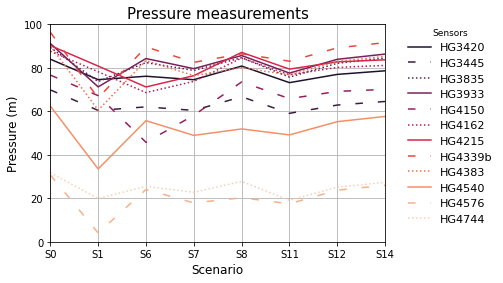

In [3]:
#Result from Assignment 1 Task 1 via. Matplotlib
lines = ['solid', (0, (5, 10)), 'dotted']
colors = sns.color_palette ('rocket', len (name))

#Code starts here
for i in range(len(name)):
    a = name [i] 
    plt.plot (hg [a], label = a, linestyle = lines [i%3], color = colors [i])

plt.xlim ('S0', 'S14')
plt.ylim (0, 100)
plt.xlabel ('Scenario', fontsize = 12)
plt.ylabel ('Pressure (m)', fontsize = 12)
plt.title ('Pressure measurements', fontsize = 15)
plt.legend(loc = 'best', bbox_to_anchor=(1.35, 1.03), frameon = False, fontsize = 11.2, title = 'Sensors', title_fontsize=9)
plt.grid ()

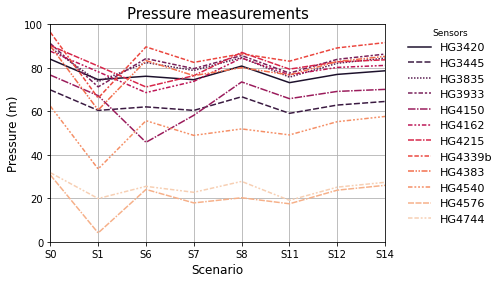

In [4]:
#Result from Assignment 1 Task 1 via. Seaborn
sns.lineplot (data = hg, palette = 'rocket')

plt.xlim ('S0', 'S14')
plt.ylim (0, 100)
plt.xlabel ('Scenario', fontsize = 12)
plt.ylabel ('Pressure (m)', fontsize = 12)
plt.title ('Pressure measurements', fontsize = 15)
plt.legend(loc = 'best', bbox_to_anchor=(1.35, 1.03), frameon = False, fontsize = 11.2, title = 'Sensors', title_fontsize=9)
plt.grid ()

####  Example 1.2: Plotting *Correlation plot*
Prossible Problem: `Seaborn` provides default plots. So, to get certain plotting results, these components might have to be adjusted or removed. <br><br> By plotting the [regression](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot), *default* via`regplot` we get the following `Seaborn` plot.

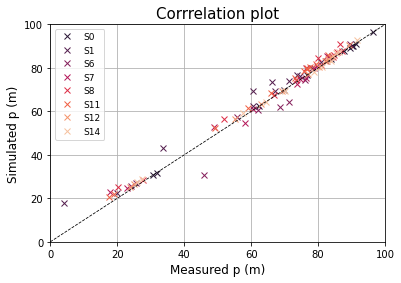

In [5]:
#Result from Assignment 1 Task 2 via. Matplotlib
colors = sns.color_palette ('rocket', len (h.index))
temp_hg = hg.values
temp_hg2 = hg2_df.values

#Code starts here
for i in range(len (h.index)):
    plt.plot (temp_hg[i], temp_hg2[i], 'x', color = colors [i], label = h.index [i])

plt.axline([0, 0], [1, 1],color = 'k', linewidth=0.8, linestyle='--')    
plt.ylim(0,100)
plt.xlim(0,100)
plt.xlabel ('Measured p (m)', fontsize = 12)
plt.ylabel ('Simulated p (m)', fontsize = 12)
plt.title ('Corrrelation plot', fontsize = 15)
plt.legend(loc = 'upper left', frameon = True, fontsize = 9, title = None, title_fontsize=9)
plt.grid ()

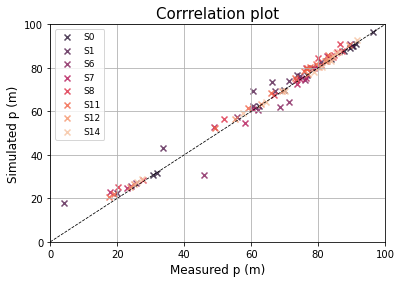

In [6]:
#Result from Assignment 1 Task 2 via. Seaborn
for ii, i in enumerate (h.index):
    sns.regplot(x = hg.T [i] , y = hg2_df.T [i], marker = 'x', ci=None , fit_reg = False,
                color = colors [ii], label = h.index[ii])
    
plt.axline([0, 0], [1, 1],color = 'k', linewidth=0.8, linestyle='--')    
plt.ylim(0,100)
plt.xlim(0,100)
plt.xlabel ('Measured p (m)', fontsize = 12)
plt.ylabel ('Simulated p (m)', fontsize = 12)
plt.title ('Corrrelation plot', fontsize = 15)
plt.legend(loc = 'upper left', frameon = True, fontsize = 9, title = None, title_fontsize=9)
plt.grid ()

## Example 2:  Visualizing with Seaborn 
`Seaborn` is a wonderful tool to not only make your statistical data look fancier, but also to get the most out of it. It provides a number of customizable plots, which also might help you to analyze your data. 
### *Clusters and Beyond*
To demonstrate a few visualization options via `Seaborn`, the datafile `multiple_cluster.csv` of *`Exercise 6: Data Science`* will be used.

In [7]:
#import of cluster datafile
X = pd.read_csv('data/multiple_clusters.csv', index_col=0)
X

,x1,x2
0,-7.246391,8.929597
1,-2.143058,-3.569374
2,-2.243381,-3.296307
3,-4.462909,7.213200
4,-5.229884,8.357374
...,...,...
95,-1.388823,7.773271
96,-1.707367,-2.501567
97,-3.774768,-3.047328
98,-1.769790,7.814725


#### First we want to somewhat recreate this figure from *`Exercise 6`*
<img src="img/plot.png" width=400 height=500 align="left"/>
<img src="img/plot2.png" width=400 height=300 align="left">

####  Example 2.1: Relplot ( *`kind = 'scatter'`, default* )
By plotting data `X` using `relplot` (Scatterplot, *default* via [relationplot](https://seaborn.pydata.org/generated/seaborn.relplot.html?highlight=relplot#seaborn.relplot)) we already get a similar figure to the one above.  

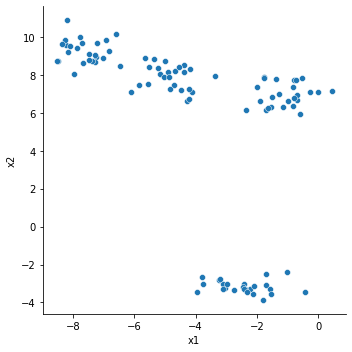

In [8]:
sns.relplot (x = X ['x1'],y= X ['x2'], data=X)

####  Example 2.2: Relplot
To get a clustered plot similar to the one from `Exercise 6` I am clustering the data using `k = 4`. <br>

Adding `hue` to the code groups the variables to elements with different colors.

In [9]:
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

(-8.97507706428594, 0.888215822740538, -4.5987606006717625, 11.610530286851006)

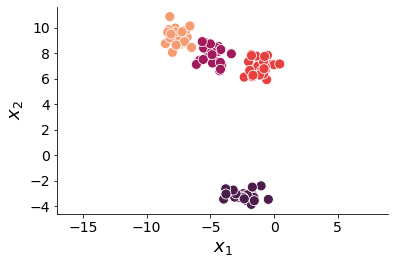

In [10]:
#Clustering the data by adding'hue'
cs = sns.color_palette('rocket', k) #Assigning color

plot = sns.relplot(x = X ['x1'], y = X ['x2'], data = X, hue = y_kmeans, palette = cs,
                   s = 100, height= 3.6, aspect= 1.5, legend = False)
                   
plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$x_2$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axis('equal')

### Playing around with different visualization options
After clustering the data we can play around with different visualization types and components to get different plotting results. <br>
####  Example 2.3: Displot (histplot, *default* via [distributionplot](https://seaborn.pydata.org/generated/seaborn.relplot.html?highlight=relplot#seaborn.relplot))


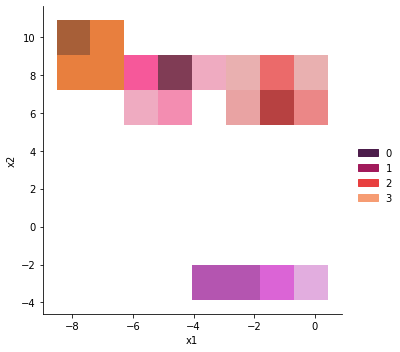

In [11]:
sns.displot (x = X ['x1'],y = X ['x2'], hue = y_kmeans, data = X, palette = cs)

####  Example 2.4: Displot ( *`kind = 'kde'`* )
By changing/adding the component `kde` (*kernel density estimate*) in [displot](https://seaborn.pydata.org/generated/seaborn.displot.html?highlight=displot#seaborn.displot) we get a different plotting output. In this way we create an output where we can also see where most of the data is accumulated. Comparing this with the figure below, we can obtain similar or even more information from the graph.

(-9.564854500697551, 1.6121849775189718, -4.46818531450686, 11.971486448289426)

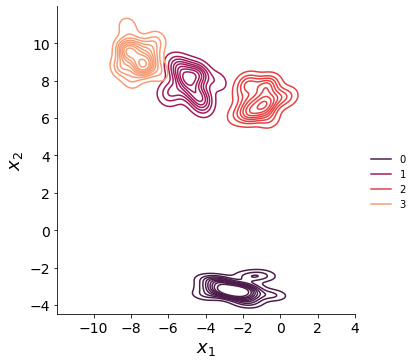

In [12]:
#adding kind='kde'
sns.displot (x = X ['x1'],y= X ['x2'],hue = y_kmeans, data=X, kind = 'kde', palette = cs)

plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$x_2$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axis('equal')

##### <div align="left"> Plotted clusters from *Exercise 6* <div>
<img src="img/plot2.png" width=400 height=300 align="left">

#### `Seaborn` also offers a number of color-palettes from which you can choose:
Link to Seaborn colors: <br>
https://seaborn.pydata.org/tutorial/color_palettes.html

####  Example 2.5: Kdeplot
It is also possible to directly use the `kdeplot`([link](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)), which gives more room for adjustments.

<AxesSubplot:xlabel='x1', ylabel='x2'>

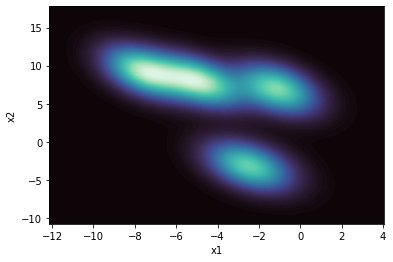

In [13]:
sns.kdeplot (x = X ['x1'],y= X ['x2'], data = X, cmap = "mako", thresh = 0, levels = 100, fill = True)

<AxesSubplot:xlabel='x1', ylabel='x2'>

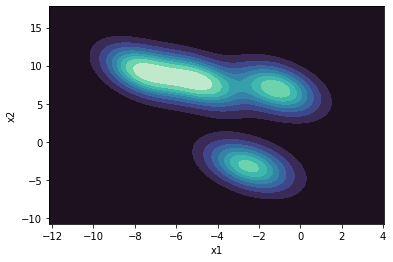

In [14]:
sns.kdeplot (x = X ['x1'],y= X ['x2'], data=X,cmap = "mako",thresh = 0, levels = 10, fill = True) #changed levels

####  Example 2.6: Jointplot

By utilizing `jointplot`([ink](https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot)) we can draw a plot of two variables with bivariate (*here: scatterplot*) and univariate (*here: hist-, lineplot*) graphs.

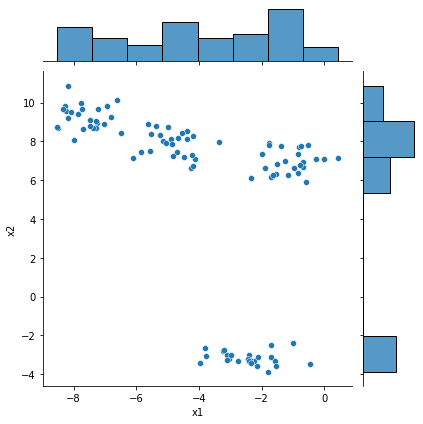

In [15]:
sns.jointplot(x = X ['x1'], y = X ['x2'], data = X, palette = cs)

Removing `hue` but adding regression ( `kind = 'reg'`).


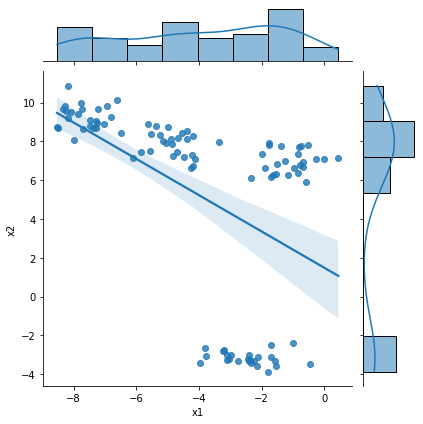

In [16]:
sns.jointplot(x = X ['x1'], y = X ['x2'], data = X, kind = 'reg', palette = cs)

Changing the component `kind` to `kind = 'kde'`.

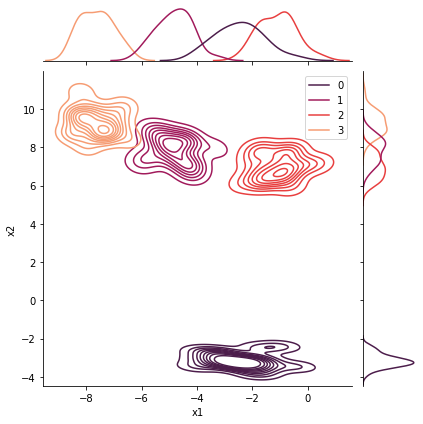

In [17]:
sns.jointplot(x = X ['x1'], y = X ['x2'], data = X, hue = y_kmeans, palette = cs, kind = 'kde')

Further customization of jointplot: <br>
https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid

####  Example 2.6: Jointplot

`Jointplot` ([link](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot)) plots the pairwise relationships in a dataset. It allows many adjustments to get the most out of your data. By default it plots a scatterplot and histplot.

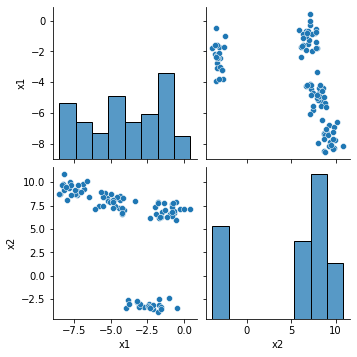

In [18]:
pl = sns.pairplot(data = X)

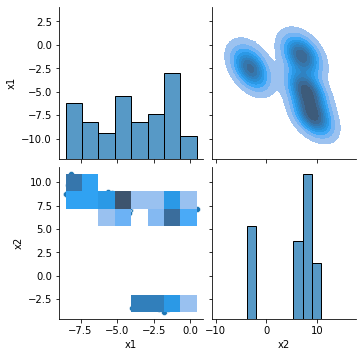

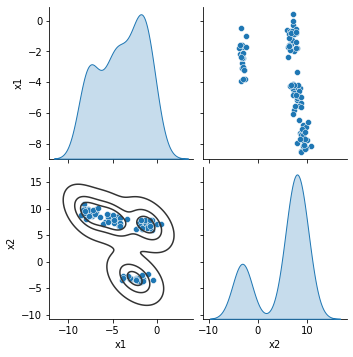

In [19]:
#Customizing pairplot
pl = sns.pairplot(data = X)
pl.map_upper (sns.histplot)
pl.map_upper (sns.kdeplot, fill = True)
pl.map_lower (sns.histplot, kde = True)

g = sns.pairplot(X, diag_kind = "kde")
g.map_lower(sns.kdeplot, levels = 4, color = ".2")

## Conclusion 
Unfortunately, it is not possible for me to show you all the things you can do with `Seaborn`. However, I hope I could give you a further understanding about `Seaborn` for your (*future*) programming with **Jupyter Notebook**. <br><br>
For further visualization options and examples visit the official `Seaborn` website: <br>
https://seaborn.pydata.org/examples/index.html

# <div align="center"> *Thank you for your attention :)* <div>